In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.__version__ #pandas version

'0.17.1'

In [4]:
from sshtunnel import SSHTunnelForwarder
import MySQLdb as db
import pandas as pd
import sys
import logging
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG) 
import paramiko
#ssh = paramiko.SSHClient()
#ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
#ssh.connect('ssicluster2.tk.informatik.tu-darmstadt.de',port = 12822, username='arun',password='ArunDss@123',allow_agent=False,look_for_keys=False)
localhost = '127.0.0.1'
user = 'root'
password='kUrsVbpyfFWF'
database = 'Energy_AD'
def query(q):
     with SSHTunnelForwarder(
          ('ssicluster2.tk.informatik.tu-darmstadt.de', 12822),
          allow_agent=False,
          ssh_username='arun',
          ssh_password = 'ArunDss@123',
          #remote_bind_address=('130.83.163.8', 3306)
          remote_bind_address=('127.0.0.1', 3306)
           
     ) as server:
          conn = db.connect(host=localhost,
          port=server.local_bind_port,
          user=user,
          passwd=password,
          db=database)

          return pd.read_sql_query(q, conn)

In [5]:
#!/home/arun/anaconda2/bin/python
import MySQLdb as db1
import pandas as pd
import datetime
import pandas.io.sql as psql

now = datetime.datetime.now()
print "Start date and time using str method of datetime object:"
print str(now)

chunk_size = 10000000
offset = 0
location = 'Siedlerstr_Trafo' + '%'
list_data = []
while True:
    q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no " % (location))
    print(q)
    list_data.append(query(q))
    offset += chunk_size
    if len(list_data[-1]) < chunk_size:
        break
print("Query executed")

print("Concatenating....")
dfs = pd.concat(list_data)

now1 = datetime.datetime.now()
print "End date and time using str method of datetime object:"
print str(now1)

print("Execution Completed")







Start date and time using str method of datetime object:
2016-12-20 16:40:01.844515
SELECT * FROM energy_sample_data1 where location like 'Siedlerstr_Trafo%' ORDER BY Serial_no 
Query executed
Concatenating....
End date and time using str method of datetime object:
2016-12-20 16:41:18.137774
Execution Completed


In [6]:
dfs = pd.DataFrame(dfs)

In [7]:
dfs.shape #DataFrame containing all fields of Siedlerstr_Trafo

(261078, 16)

In [8]:
dfs.iloc[0][:]

Serial_no                          3391426
Date                            2016-03-07
Time                       0 days 10:47:32
V1                                    0.12
V2                                    0.12
V3                                    0.12
I1                                    1.28
I2                                    0.61
I3                                     0.9
I_N                                   0.67
Pges                                 -2.62
Sges                                     0
CosPhi                                7.52
Egy_trpt                               317
Egy_con                              15115
Location     Siedlerstr_Trafo_07032016.csv
Name: 0, dtype: object

In [9]:
cols = 'DESC energy_sample_data1 '
columns_list = query(cols)

In [10]:
cols_sql = pd.DataFrame(columns_list)
print("Columns names:")
print(cols_sql.iloc[:,0])

Columns names:
0     Serial_no
1          Date
2          Time
3            V1
4            V2
5            V3
6            I1
7            I2
8            I3
9           I_N
10         Pges
11         Sges
12       CosPhi
13     Egy_trpt
14      Egy_con
15     Location
Name: Field, dtype: object


In [11]:
df_cols = cols_sql.iloc[:,0]
columns_names= df_cols.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['Serial_no', 'Date', 'Time', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3', 'I_N', 'Pges', 'Sges', 'CosPhi', 'Egy_trpt', 'Egy_con', 'Location']


In [12]:
dfs.corr()

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Serial_no,1.000000,-0.311442,-0.311729,-0.309058,-0.388935,-0.351622,-0.324602,-0.344054,0.060782,-0.370295,0.294103,0.739018,0.744597
V1,-0.311442,1.000000,0.999978,0.999974,0.400175,0.449273,0.448327,0.507511,0.079362,0.454214,-0.945238,0.306475,0.300513
V2,-0.311729,0.999978,1.000000,0.999971,0.399342,0.447132,0.448278,0.505664,0.075925,0.453160,-0.945271,0.305992,0.300034
V3,-0.309058,0.999974,0.999971,1.000000,0.397965,0.448041,0.448215,0.505986,0.080235,0.452964,-0.945254,0.308812,0.302842
I1,-0.388935,0.400175,0.399342,0.397965,1.000000,0.894966,0.896942,0.590240,-0.143536,0.965880,-0.384583,-0.024062,-0.026502
I2,-0.351622,0.449273,0.447132,0.448041,0.894966,1.000000,0.887442,0.733333,0.262673,0.962336,-0.429234,0.056360,0.052813
I3,-0.324602,0.448327,0.448278,0.448215,0.896942,0.887442,1.000000,0.614348,-0.117165,0.961984,-0.431590,0.081857,0.078236
I_N,-0.344054,0.507511,0.505664,0.505986,0.590240,0.733333,0.614348,1.000000,0.322273,0.672741,-0.481414,0.103189,0.100408
Pges,0.060782,0.079362,0.075925,0.080235,-0.143536,0.262673,-0.117165,0.322273,1.000000,0.001405,-0.071523,0.135335,0.133753
Sges,-0.370295,0.454214,0.453160,0.452964,0.965880,0.962336,0.961984,0.672741,0.001405,1.000000,-0.435116,0.041292,0.037900


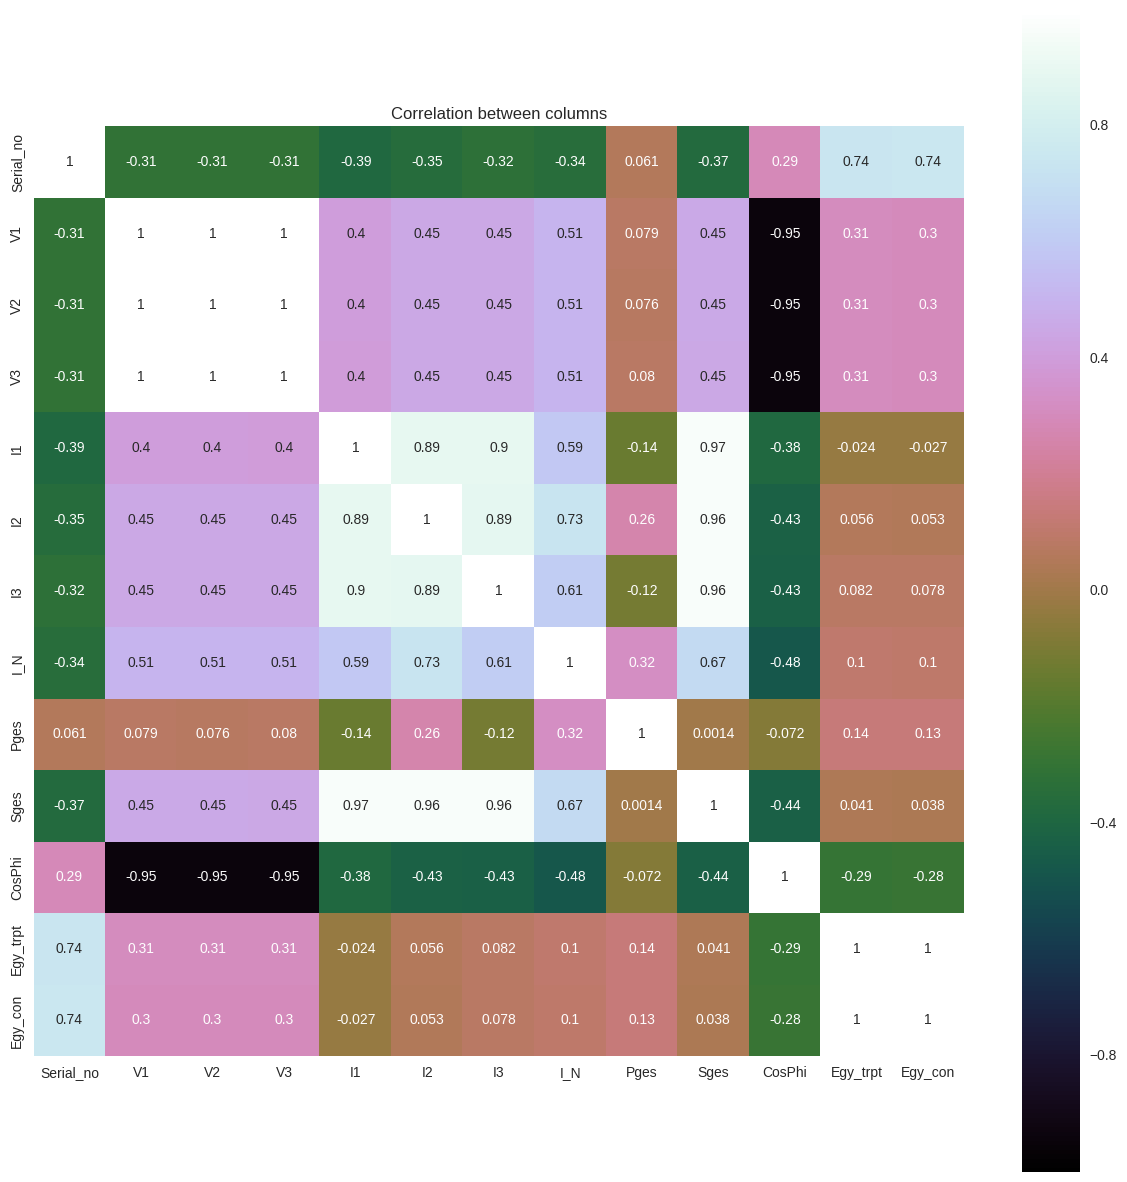

In [13]:
correlation = dfs.corr()
#plt.figure(figsize=(13,13))
fig = plt.figure(figsize=(15,15)) 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between columns')

fig.savefig('Correlation between  before dimensionality reduction of Siedlerstr_Trafo.png')

# PCA implementation

In [14]:
dfs.axes

[Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             261068, 261069, 261070, 261071, 261072, 261073, 261074, 261075,
             261076, 261077],
            dtype='int64', length=261078),
 Index([u'Serial_no', u'Date', u'Time', u'V1', u'V2', u'V3', u'I1', u'I2',
        u'I3', u'I_N', u'Pges', u'Sges', u'CosPhi', u'Egy_trpt', u'Egy_con',
        u'Location'],
       dtype='object')]

In [15]:
dfs.columns

Index([u'Serial_no', u'Date', u'Time', u'V1', u'V2', u'V3', u'I1', u'I2',
       u'I3', u'I_N', u'Pges', u'Sges', u'CosPhi', u'Egy_trpt', u'Egy_con',
       u'Location'],
      dtype='object')

In [16]:
dfs_drop = dfs.drop(labels =['Date','Time','Serial_no'],axis=1)

In [17]:
dfs_drop.head()

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
0,0.12,0.12,0.12,1.28,0.61,0.90,0.67,-2.62,0.00,7.52,317,15115,Siedlerstr_Trafo_07032016.csv
1,0.12,0.12,0.12,1.28,0.61,0.90,0.67,-2.62,0.00,7.52,317,15115,Siedlerstr_Trafo_07032016.csv
2,229.28,229.10,229.13,155.42,194.70,166.25,57.08,8559.71,118228.31,0.67,317,15115,Siedlerstr_Trafo_07032016.csv
3,229.28,229.10,229.13,155.42,194.70,166.25,57.08,8559.71,118228.31,0.67,552,15423,Siedlerstr_Trafo_07032016.csv
4,229.28,229.10,229.13,155.42,194.70,166.25,57.08,8559.71,118228.31,0.67,552,15423,Siedlerstr_Trafo_07032016.csv


# Plot statistics by grouping location 

In [20]:
df_loc = dfs_drop.groupby('Location') # groupby location wise

In [24]:
df_loc.describe()

V1            V2            V3  \
Location                                                                        
Siedlerstr_Trafo_07032016.csv count  47548.000000  47548.000000  47548.000000   
                              mean     231.613080    231.575366    231.418249   
                              std        2.111718      2.137851      2.116894   
                              min        0.120000      0.120000      0.120000   
                              25%      230.700000    230.720000    230.480000   
                              50%      231.560000    231.510000    231.460000   
                              75%      232.570000    232.580000    232.430000   
                              max      237.110000    237.540000    236.800000   
Siedlerstr_Trafo_08032016.csv count  86400.000000  86400.000000  86400.000000   
                              mean     232.285697    232.264127    232.272204   
                              std        1.599978      1.615606      1.576657   
                              min      226.940000    226.620000    226.740000   
                              25%      231.260000    231.250000    231.270000   
                              50%      232.540000    232.560000    232.630000   
                              75%      233.430000    233.400000    233.380000   
                              max      236.620000    236.700000    236.280000   
Siedlerstr_Trafo_09032016.csv count  86400.000000  86400.000000  86400.000000   
                              mean     232.435212    232.335071    232.502682   
                              std        1.700104      1.714013      1.722450   
                              min      228.220000    227.970000    228.050000   
                              25%      231.130000    231.030000    231.200000   
                              50%      232.220000    232.180000    232.360000   
                              75%      233.850000    233.710000    233.950000   
                              max      236.320000    236.220000    236.080000   
Siedlerstr_Trafo_10032016.csv count  30004.000000  30004.000000  30004.000000   
                              mean     231.610724    231.638825    231.833727   
                              std        1.174398      1.201504      1.154083   
                              min      228.260000    228.070000    228.560000   
                              25%      230.870000    230.890000    231.120000   
                              50%      231.530000    231.520000    231.760000   
                              75%      232.310000    232.350000    232.520000   
                              max      234.730000    234.950000    234.890000   
Siedlerstr_Trafo_19022016.csv count  10726.000000  10726.000000  10726.000000   
                              mean      55.162268     55.160924     55.158248   
                              std       99.731606     99.720598     99.724359   
                              min        0.000000      0.000000      0.000000   
                              25%        0.110000      0.120000      0.110000   
                              50%        0.110000      0.120000      0.110000   
                              75%        0.120000      0.130000      0.120000   
                              max      237.100000    237.080000    237.060000   

                                               I1            I2            I3  \
Location                                                                        
Siedlerstr_Trafo_07032016.csv count  47548.000000  47548.000000  47548.000000   
                              mean     164.966949    173.023348    158.104241   
                              std       40.413539     42.417349     35.129910   
                              min        1.280000      0.610000      0.900000   
                              25%      138.640000    141.290000    132.410000   
                              50%      163.440000    171.300000    157.915000

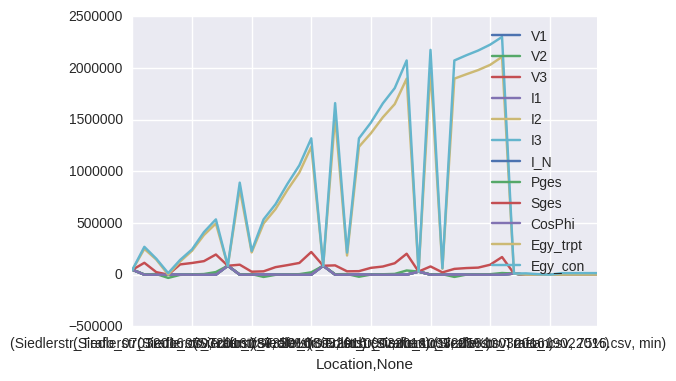

In [27]:
df_loc.describe().plot()
plt.legend(loc = 'upper right')

In [ ]:
df_loc.to_csv(r'Siedlr_trafo_stats.csv',mode='w',header='True')

Below you will calculate the correlation on the data grouped by location

In [37]:
df_loc_siedlr_trafo_stats = df_loc.corr(method='pearson', min_periods=1)

In [56]:
df_loc_siedlr_trafo_stats.to_csv(r'Siedlr_trafo_stats.csv',mode='w',header='True')

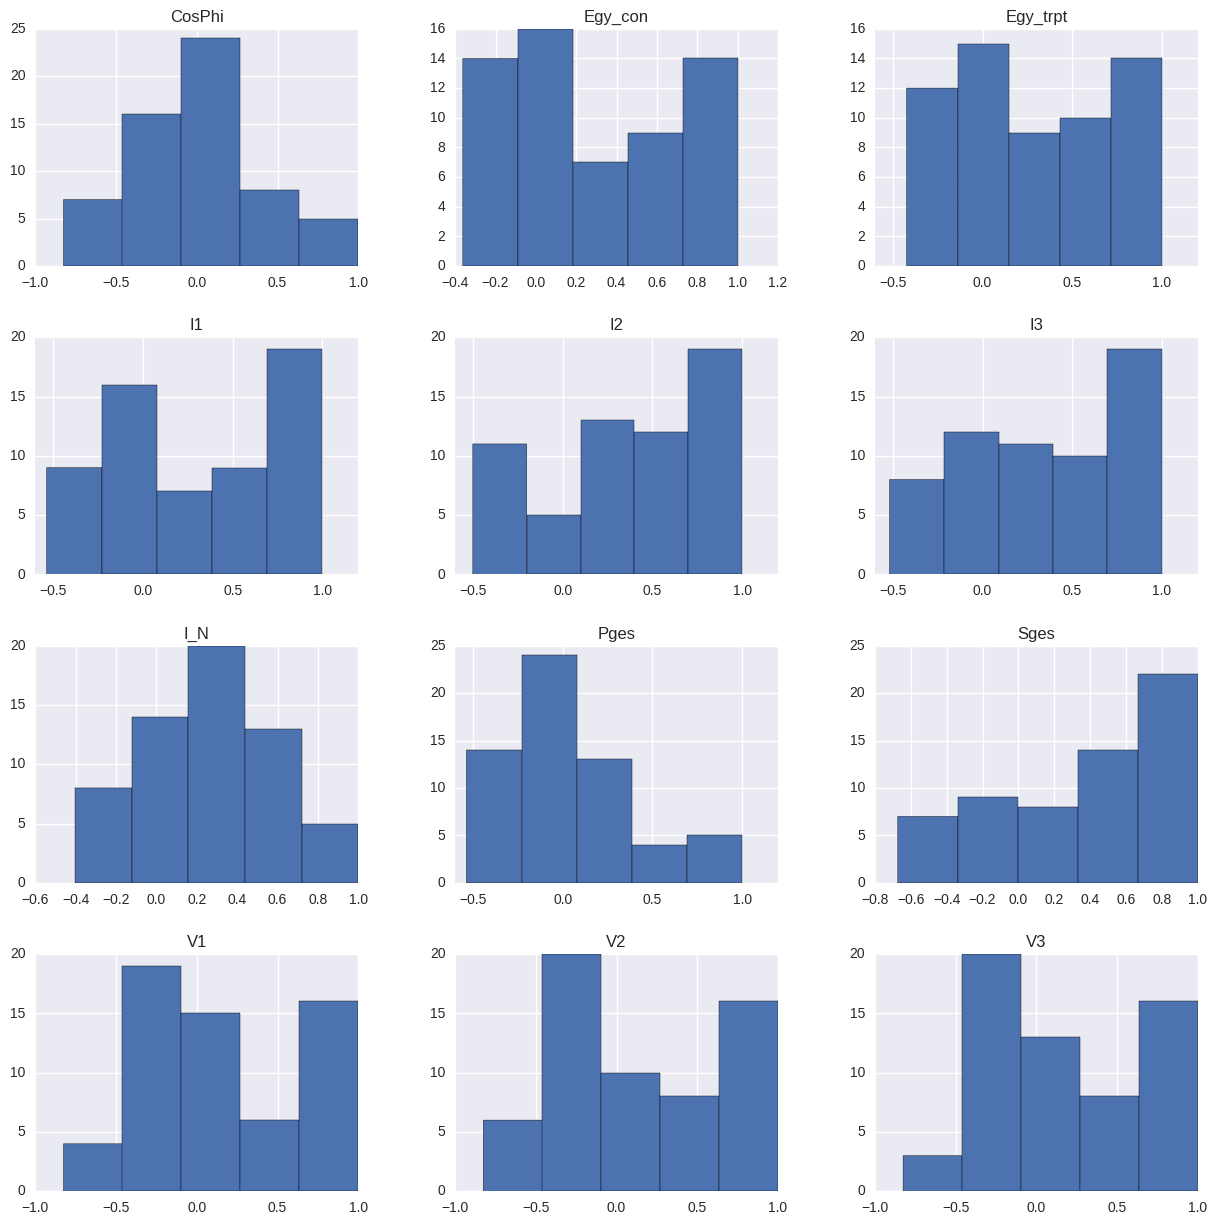

In [53]:
df_loc_siedlr_trafo_stats.hist(bins=5,figsize=(15,15))
plt.savefig('Correlation statistics of Siedlerstr_Trafo.png')
plt.show()


Compute only the mean of the data grouped by location and visualize

In [64]:
df_st_mean = df_loc.mean()
df_st_mean

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Location,,,,,,,,,,,,
Siedlerstr_Trafo_07032016.csv,231.613080,231.575366,231.418249,164.966949,173.023348,158.104241,63.452554,1870.054034,114825.456567,0.663869,249216.997752,269377.082949
Siedlerstr_Trafo_08032016.csv,232.285697,232.264127,232.272204,132.318821,143.893769,139.765078,53.114578,1743.197390,96549.769629,0.653059,830824.599519,890472.632195
Siedlerstr_Trafo_09032016.csv,232.435212,232.335071,232.502682,120.353157,138.411570,128.357827,54.828630,3932.407001,89859.645953,0.646108,1529595.055947,1660051.221617
Siedlerstr_Trafo_10032016.csv,231.610724,231.638825,231.833727,102.917607,120.147462,120.598321,44.182100,1996.875818,79670.523186,0.658302,1987564.610325,2175426.674646
Siedlerstr_Trafo_19022016.csv,55.162268,55.160924,55.158248,1.223378,0.762892,0.782831,0.818652,-56.768861,175.844418,8.457954,256.116260,12761.141805


In [76]:
df_st_mean

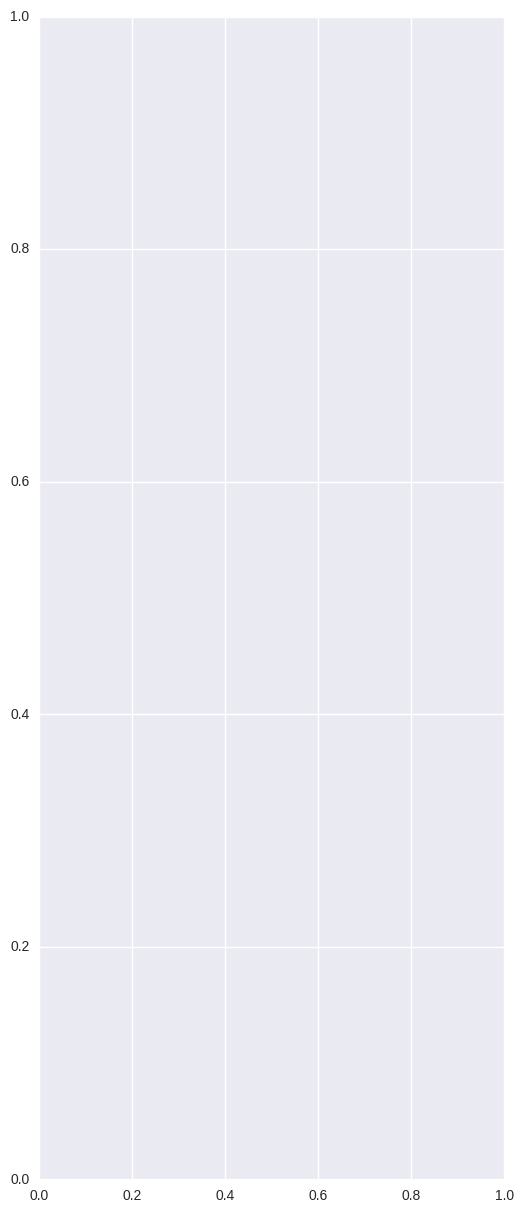

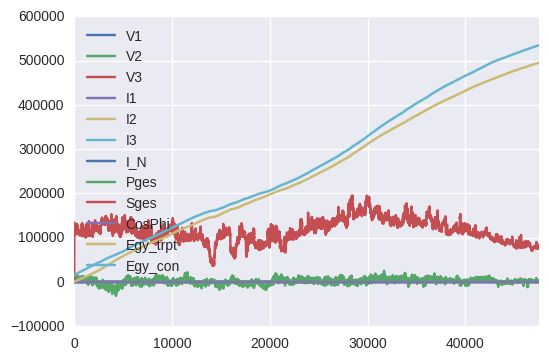

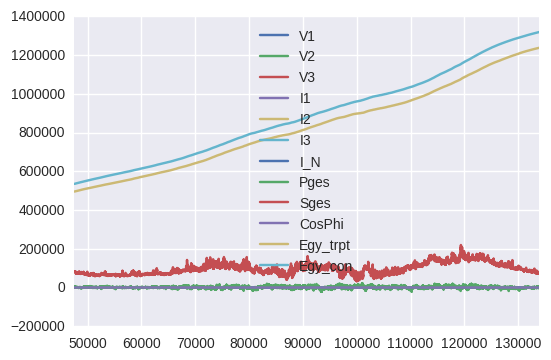

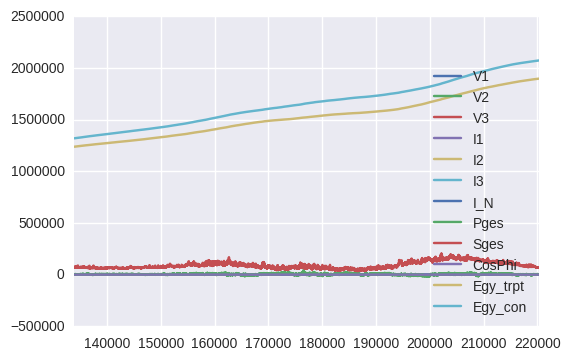

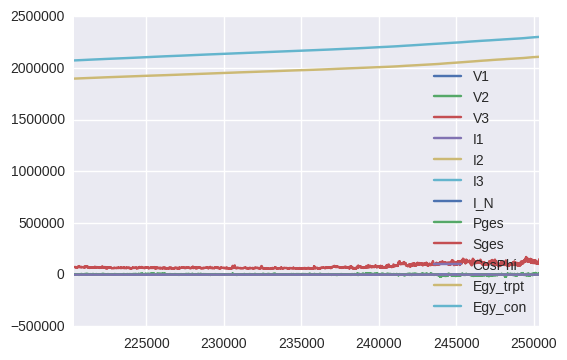

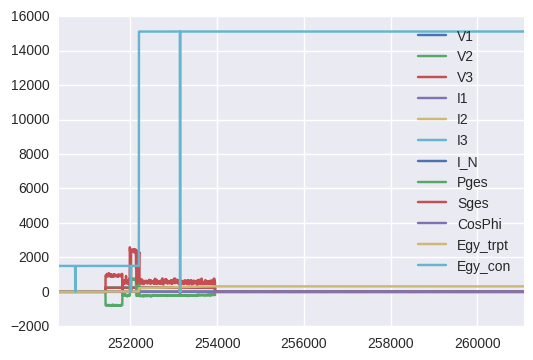

In [86]:
fig1,ax2 = plt.subplots(figsize=(6,15))
bp = df_loc.plot(kind='kde', ax2 = ax2, legend=False)
